# Unsupervised Learning and K-Means Clustering with Python
**A tutorial by Thomas Jurczyk, CERES (Bochum)**

This notebook includes the code used in my clustering tutorial for the [Programming Historian](https://programminghistorian.org/). Please note that you need to save the dataset `DNP_authors.csv` in the same folder as this Jupyter notebook. The dataset is available in my [GitHub repository](https://github.com/thomjur/introduction_to_k-means_clustering_PH).

If you have any questions or comments, please send them to [my email address](mailto:thomas.jurczyk-q88@rub.de).
<br>
<br>
---

## 1. Loading dataset & exploratory data analysis

In [1]:
import pandas as pd

# load the dataset that has been stored as .csv files in the same folder
# using the author names as index
df_authors = pd.read_csv("books.csv", index_col=0)

# display dataset structure with the pandas .info() method
print(df_authors.info())

# show first 5 rows
print(df_authors.head(5))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 0 to 300
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   book_id           301 non-null    int64  
 1   genre             301 non-null    object 
 2   publication_year  301 non-null    int64  
 3   price             301 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 11.8+ KB
None
   book_id    genre  publication_year  price
0        0  Romance              2012  31.19
1        1   Horror              2009  13.21
2        2  Fantasy              2012  26.99
3        3   Horror              2008  26.95
4        4  Fantasy              2004  26.10


In [2]:
df_authors.describe()

,book_id,publication_year,price
count,301.000000,301.000000,301.000000
mean,150.000000,2010.415282,31.153987
std,87.035433,4.670150,170.071332
min,0.000000,2003.000000,8.750000
25%,75.000000,2006.000000,16.000000
50%,150.000000,2011.000000,22.040000
75%,225.000000,2015.000000,26.660000
max,300.000000,2018.000000,2970.000000


## 2. Initializing k-means & scaler

In [3]:
# clustering part
from sklearn.preprocessing import StandardScaler as SS
from sklearn.cluster import KMeans

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# initializing k-means and scaler

In [5]:
scaler = SS()
kmeans = KMeans(n_clusters=3, random_state=42)

## 3. Applying k-means clustering on the dataset

# One Hot Encode Categorical Variables

In [7]:
dummies = pd.get_dummies(df_authors['genre'])

In [12]:
df_authors = pd.concat([df_authors, dummies], axis=1)

In [ ]:
#heart = pd.get_dummies(heart, columns = ['sex', 'chest_pain', 'blood_sugar', 'restecg', 'exang', 'slope', 'thal'], drop_first=True)

In [37]:
df_authors_cp[df_authors_cp['publication_year'].isna()]

,book_id,genre,publication_year,price,Fantasy,Horror,Mystery Fiction,Romance,Young Adult,wc_scaled,articles_scaled,clusters,clusters_2


In [44]:
df_authors_cp['price']

0      31.19
1      13.21
2      26.99
3      26.95
4      26.10
       ...  
296    25.08
297    22.15
298    16.63
299    19.69
300    24.06
Name: price, Length: 301, dtype: float64

In [35]:
df_authors_cp.describe(include='all')

,book_id,genre,publication_year,price,Fantasy,Horror,Mystery Fiction,Romance,Young Adult,wc_scaled,articles_scaled,clusters,clusters_2
count,301.000000,301,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,3.010000e+02,3.010000e+02,301.000000,301.000000
unique,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Mystery Fiction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,150.000000,NaN,2010.415282,31.153987,0.219269,0.179402,0.239203,0.176080,0.186047,2.025401e-14,-1.770455e-17,0.514950,1.411960
std,87.035433,NaN,4.670150,170.071332,0.414440,0.384328,0.427307,0.381522,0.389792,1.001665e+00,1.001665e+00,0.507224,1.273992
min,0.000000,NaN,2003.000000,8.750000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.590448e+00,-1.319523e-01,0.000000,0.000000
25%,75.000000,NaN,2006.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.470007e-01,-8.925209e-02,0.000000,0.000000
50%,150.000000,NaN,2011.000000,22.040000,0.000000,0.000000,0.000000,0.000000,0.000000,1.254117e-01,-5.367844e-02,1.000000,1.000000
75%,225.000000,NaN,2015.000000,26.660000,0.000000,0.000000,0.000000,0.000000,0.000000,9.833416e-01,-2.646813e-02,1.000000,3.000000


In [52]:
# scale the "word_count" and "articles" columns of df_authors
df_authors_cp = df_authors.copy()
scaled_columns = scaler.fit_transform(df_authors_cp[["price"]])
df_authors_cp["wc_scaled"] = scaled_columns[:,0]
#df_authors_cp["articles_scaled"] = scaled_columns[:,1]
df_authors_cp.head(5)

,book_id,genre,publication_year,price,Fantasy,Horror,Mystery Fiction,Romance,Young Adult,wc_scaled
0,0,Romance,2012,31.19,0,0,0,1,0,0.000212
1,1,Horror,2009,13.21,0,1,0,0,0,-0.105684
2,2,Fantasy,2012,26.99,1,0,0,0,0,-0.024525
3,3,Horror,2008,26.95,0,1,0,0,0,-0.024760
4,4,Fantasy,2004,26.10,1,0,0,0,0,-0.029766


In [53]:
# clustering df_authors_cp
kmeans.fit(df_authors_cp[[ "price"]])
df_authors_cp["clusters"] = kmeans.labels_

## 4. Plotting the cluster with seaborn

In [55]:
sns.scatterplot(x="wc_scaled", y="articles_scaled", hue="clusters", data=df_authors_cp)
plt.ylim(-1.5, 1.5)

ValueError: Either both or neither of `x` and `y` must be specified (but try passing to `data`, which is more flexible).

In [27]:
df_authors_cp[df_authors_cp["clusters"] == 2]

,book_id,genre,publication_year,price,Fantasy,Horror,Mystery Fiction,Romance,Young Adult,wc_scaled,articles_scaled,clusters
185,185,Fantasy,2013,2970.0,1,0,0,0,0,0.554377,17.308855,2


## 5. Applying the "elbow method" (hyperparameter tuning)

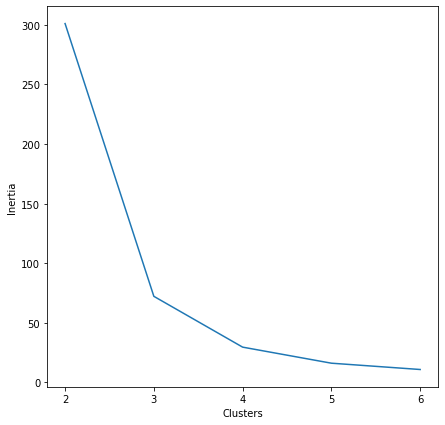

In [28]:
# elbow method
# preparing data for plotting
cluster_range = list(range(2,7))
inertia_list = []

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_authors_cp[["wc_scaled", "articles_scaled"]])
    inertia_list.append(kmeans.inertia_)

# plotting
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
sns.lineplot(y=inertia_list, x=cluster_range, ax=ax)
ax.set_xlabel("Clusters")
ax.set_ylabel("Inertia")
ax.set_xticks([2,3,4,5,6])

In [29]:
# k-means with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_authors_cp[["wc_scaled", "articles_scaled"]])

df_authors_cp["clusters_2"] = kmeans.labels_

## 6. Plotting the final clusters

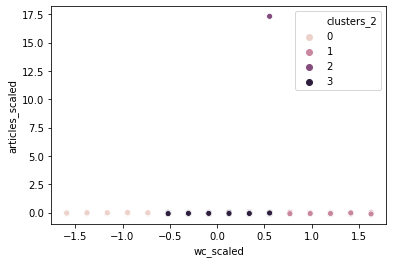

In [31]:
sns.scatterplot(x="wc_scaled", y="articles_scaled", hue="clusters_2", data=df_authors_cp)
plt.savefig("results_2")